In [1]:
%pylab inline
from simulation import *
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec
import os
import multiprocessing
num_cores = multiprocessing.cpu_count() - 1


Populating the interactive namespace from numpy and matplotlib


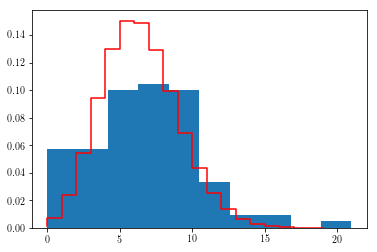

In [2]:
gamelogs2017= [file for file in os.listdir("./gamelogs/2017") if file.endswith("txt")]

gamelogs = []
gamelogs += ["./gamelogs/2017/"+file for file in gamelogs2017]
Lebron_FT  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tLeBron' in line and "free throw" in line]) for game in gamelogs]

n_ft = [len(l) for l in Lebron_FT]
poisson_mean = np.mean(n_ft)
x = np.arange(20)
g1 = poisson.pmf(x,poisson_mean)

plt.hist(n_ft, density=True, bins=10)
plt.step(x,g1,color="red")

In [3]:
bron_0 = infer_model(Lebron_FT,["+","-"],0,0)
bron_1 = infer_model(Lebron_FT,["+","-"],1,1)

In [4]:
trajectories, _ = simulate_freethrows(bron_1[0],poisson_mean, 91)

In [5]:
def sim_one():
    trajectories, _ = simulate_freethrows(bron_1[0],poisson_mean, 91)
    crit = evaluate_models([l for l in trajectories if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
    return(crit)

def sim_zero():
    trajectories, _ = simulate_freethrows(bron_0[0],poisson_mean, 91)
    crit = evaluate_models([l for l in trajectories if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
    return(crit)

In [6]:
n_sims = 10000

results_1 =  Parallel(n_jobs=num_cores)(delayed(sim_one)() for k in range(n_sims))  
results_1[0]

{'AIC': {0: 796.2134937413254,
  1: 796.7294697254443,
  2: 801.5588491259336,
  3: 809.6528476368889},
 'DIC1': {0: 796.2081524989142,
  1: 796.6629195285014,
  2: 801.1962317098144,
  3: 807.8023642003468},
 'DIC2': {0: 796.2055167303811,
  1: 796.6372482194994,
  2: 801.0131460097716,
  3: 807.0311884537641},
 'LOO': {0: 796.0211291592204,
  1: 796.597800559746,
  2: 801.183216747803,
  3: 808.7250786931579},
 'LPD': {0: 793.5208181514045,
  1: 788.6560536034989,
  2: 782.7399385137128,
  3: 769.437778651847},
 'LPPD': {0: 794.4199021023396,
  1: 790.8959729919513,
  2: 787.963622497809,
  3: 780.4157334377893},
 'LPPDCV2': {0: 794.8405501405537,
  1: 793.2854427229963,
  2: 791.8730559616356,
  3: 797.4993354206034},
 'WAIC1': {0: 796.0026426271988,
  1: 796.5098327975104,
  2: 800.8482166497924,
  3: 807.3583908370739},
 'WAIC2': {0: 796.0208798373873,
  1: 796.5959057789282,
  2: 801.1688924073931,
  3: 808.6098437992285},
 'kDIC1': {0: 0.9968801341443623,
  1: 2.9600166337706924

In [7]:
results_0 = Parallel(n_jobs=num_cores)(delayed(sim_zero)() for k in range(n_sims))  
results_0[20]

{'AIC': {0: 809.9290501663945,
  1: 812.0077049776097,
  2: 817.2474165037662,
  3: 820.0325345810421},
 'DIC1': {0: 809.9238010411323,
  1: 811.9399249008122,
  2: 816.8874900775859,
  3: 818.194557900342},
 'DIC2': {0: 809.9211744865333,
  1: 811.9202032304609,
  2: 816.6634597616528,
  3: 817.5850932143726},
 'LOO': {0: 809.9404986422178,
  1: 811.8859430355842,
  2: 816.7647199200454,
  3: 820.2877600583993},
 'LPD': {0: 807.2363660768142,
  1: 803.9344824618055,
  2: 798.4277162994947,
  3: 779.8213220830793},
 'LPPD': {0: 807.9386266233496,
  1: 806.1707871795801,
  2: 803.7425565326371,
  3: 790.0556792923605},
 'LPPDCV2': {0: 812.9967548544032,
  1: 815.2761878374315,
  2: 820.6685607134169,
  3: 821.1342554263407},
 'WAIC1': {0: 809.9150955420978,
  1: 811.7926539377346,
  2: 816.4341926537365,
  3: 818.5451908568457},
 'WAIC2': {0: 809.9401247005677,
  1: 811.8838770466339,
  2: 816.750648448852,
  3: 820.0509379368382},
 'kDIC1': {0: 0.9969399584081202,
  1: 2.95820434215488

In [8]:
import pickle, gzip

with gzip.open('../../freethrow_sims.gz','wb') as f:
    pickle.dump([results_0,results_1],f)

In [9]:
trajectories, _ = simulate_freethrows(bron_0[0],poisson_mean, 91)

In [10]:
np.mean([len(l) for l in trajectories])

6.8791208791208796

In [11]:
np.mean([len(l) for l in Lebron_FT])

6.93

In [12]:
poisson_mean

6.93